In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
)
from ripple_heterogeneity.general import immobility_firing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
import nelpy as nel
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from scipy import stats

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [35]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")

save_path = (r"Z:\home\ryanh\projects\ripple_heterogeneity\immobility_firing_v1")

batch_analysis.run(
    df,
    save_path,
    immobility_firing.run,
    parallel=True,
)
# load results
results = batch_analysis.load_results(save_path)

results.deepSuperficial.replace(np.nan,"unknown",inplace=True)
results = results.query("deepSuperficial.str.contains('Deep|Superficial')")

100%|██████████| 311/311 [00:07<00:00, 44.05it/s]


In [36]:
results

,UID,brainRegion,putativeCellType,deepSuperficial,immobile_fr,mobile_fr,fr_diff_ratio_a,fr_diff_ratio_b,fr_diff_ratio_c,fr_diff,basepath
0,1,CA1so,Pyramidal Cell,Deep,0.155477,0.186681,-0.091198,-0.167152,0.832848,-0.031204,Z:\Data\AYAold\AB1\day1
1,2,CA1sr,Pyramidal Cell,Superficial,0.088104,0.044864,0.325186,0.963781,1.963781,0.043239,Z:\Data\AYAold\AB1\day1
3,10,CA1sr,Pyramidal Cell,Superficial,0.412014,0.634563,-0.212645,-0.350713,0.649287,-0.222549,Z:\Data\AYAold\AB1\day1
5,15,CA1sr,Pyramidal Cell,Superficial,1.920139,2.145879,-0.055519,-0.105197,0.894803,-0.225741,Z:\Data\AYAold\AB1\day1
11,22,CA1sr,Pyramidal Cell,Superficial,0.427561,0.387429,0.049242,0.103585,1.103585,0.040132,Z:\Data\AYAold\AB1\day1
...,...,...,...,...,...,...,...,...,...,...,...
7602,112,CA1so,Pyramidal Cell,Deep,0.174325,0.109941,0.226490,0.585617,1.585617,0.064383,Z:\Data\ORproject\OR23\day5
7603,113,CA1sp,Pyramidal Cell,Deep,0.037897,0.050055,-0.138234,-0.242893,0.757107,-0.012158,Z:\Data\ORproject\OR23\day5
7604,114,CA1sp,Pyramidal Cell,Deep,0.090952,0.061972,0.189504,0.467623,1.467623,0.028980,Z:\Data\ORproject\OR23\day5
7605,115,CA1sr,Pyramidal Cell,Superficial,3.342486,3.184423,0.024217,0.049636,1.049636,0.158063,Z:\Data\ORproject\OR23\day5


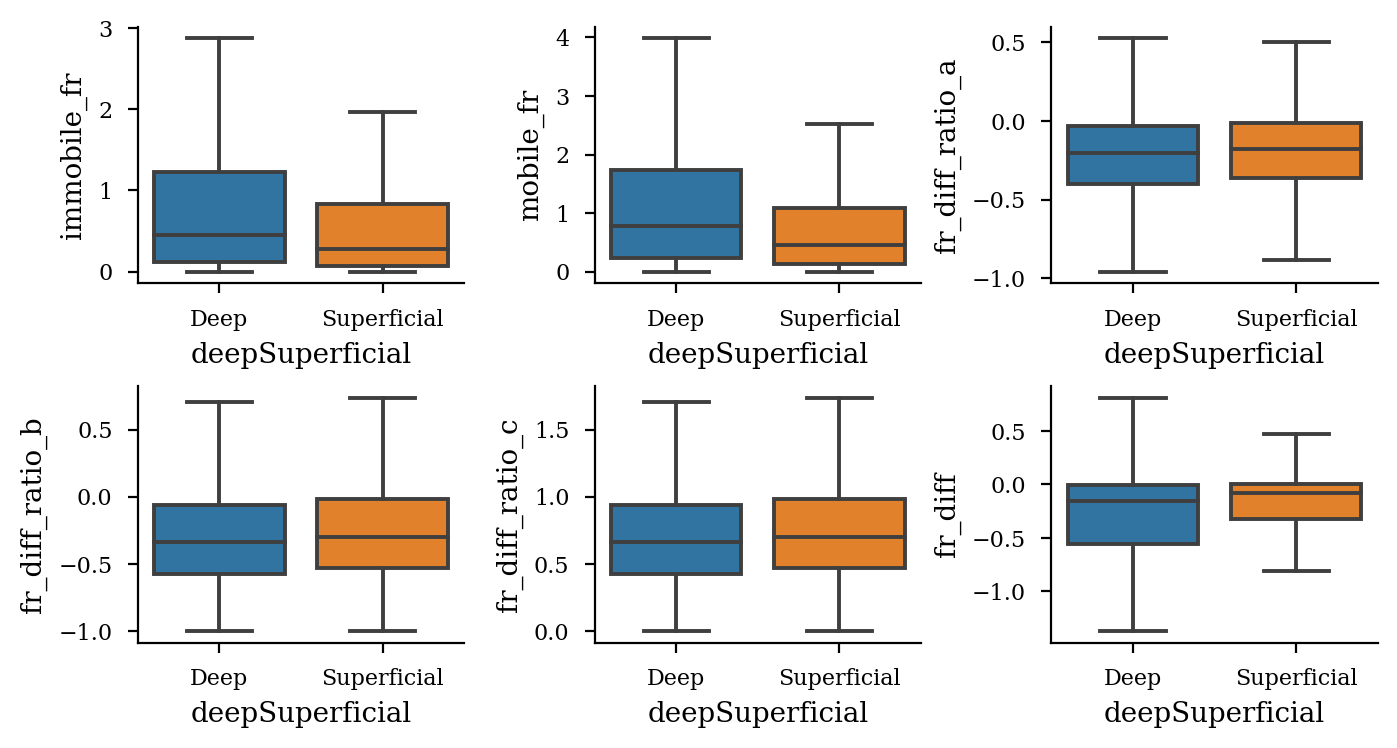

In [37]:
fig, ax = plt.subplots(2,3,figsize=(8,4))
ax = ax.flatten()
fig.subplots_adjust(wspace=0.4,hspace=0.4)

sns.boxplot(data=results,x="deepSuperficial",y="immobile_fr",ax=ax[0],showfliers=False)
sns.boxplot(data=results,x="deepSuperficial",y="mobile_fr",ax=ax[1],showfliers=False)
sns.boxplot(data=results,x="deepSuperficial",y="fr_diff_ratio_a",ax=ax[2],showfliers=False)
sns.boxplot(data=results,x="deepSuperficial",y="fr_diff_ratio_b",ax=ax[3],showfliers=False)
sns.boxplot(data=results,x="deepSuperficial",y="fr_diff_ratio_c",ax=ax[4],showfliers=False)
sns.boxplot(data=results,x="deepSuperficial",y="fr_diff",ax=ax[5],showfliers=False)
sns.despine()

<AxesSubplot: xlabel='mobile_fr', ylabel='immobile_fr'>

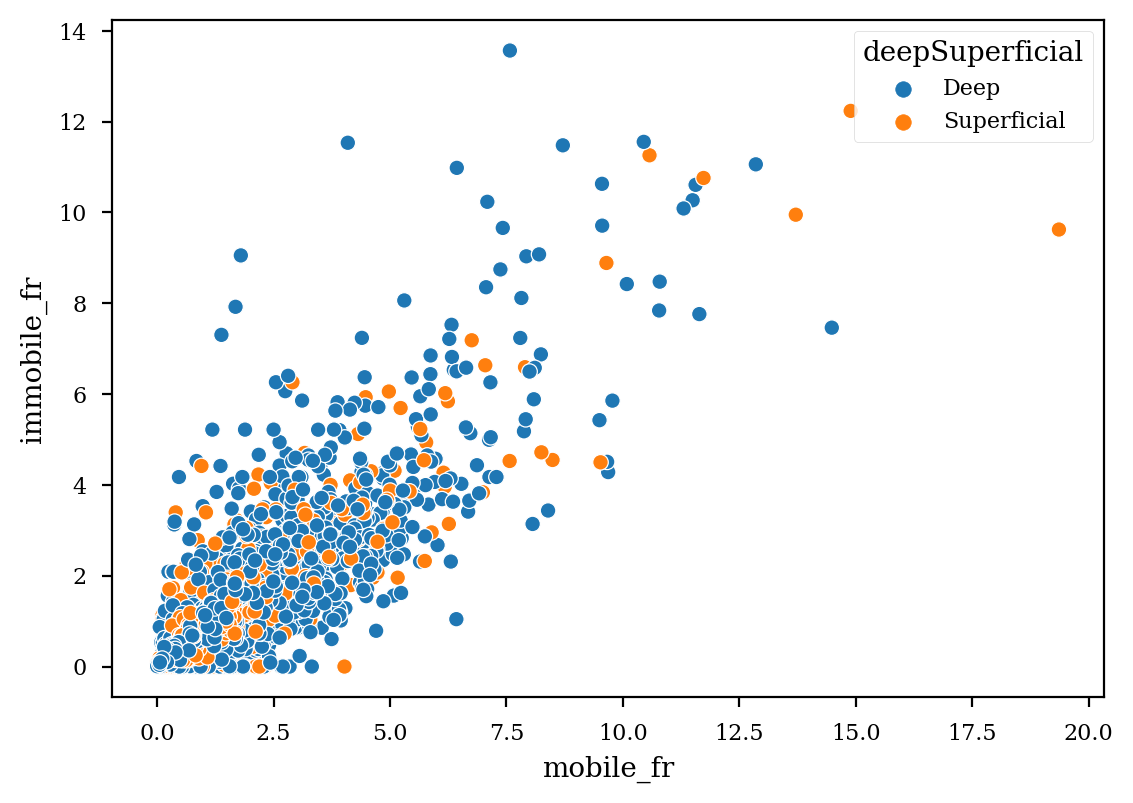

In [34]:
sns.scatterplot(data=results.query("deepSuperficial.str.contains('Deep|Superficial')"),x="mobile_fr",y="immobile_fr",hue="deepSuperficial")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_Deep vs. 1_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:4.895e-03 U_stat=2.750e+06


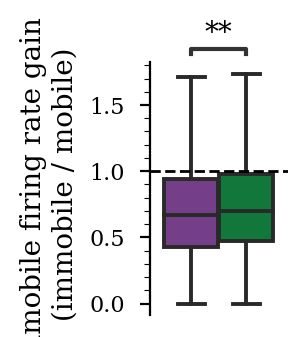

In [93]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.15, subplots=(3, 1)), edgecolor=None
)
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))
results["constant"] = 1
sns.boxplot(
    x="constant",
    y="fr_diff_ratio_c",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=results,
    showfliers=False,
)
plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel("immobile firing rate gain \n (immobile / mobile)")
ax.axhline(1, color="k", linestyle="--", linewidth=1)
ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
ax.get_legend().remove()
ax.set_xlabel("")
box_pairs = [
    ((1, "Deep"), (1, "Superficial")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=results,
    x="constant",
    y="fr_diff_ratio_c",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

plt.savefig(
    os.path.join(fig_save_path, "immobility_firing_deep_sup.svg"),
    dpi=300,
    bbox_inches="tight",
)

In [91]:
x = results.query("deepSuperficial.str.contains('Deep') & not fr_diff_ratio_c.isnull()").fr_diff_ratio_c.values
print(stats.ttest_1samp(x, popmean=1))

x = results.query("deepSuperficial.str.contains('Superficial') & not fr_diff_ratio_c.isnull()").fr_diff_ratio_c.values
print(stats.ttest_1samp(x, popmean=1))

Ttest_1sampResult(statistic=-10.994004167986281, pvalue=1.1997583831355686e-27)
Ttest_1sampResult(statistic=-6.252673180482836, pvalue=5.08081219219065e-10)


c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


              Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  fr_diff_ratio_c
No. Observations:   5083     Method:              ML             
No. Groups:         222      Scale:               0.0293         
Min. group size:    1        Log-Likelihood:      1624.4391      
Max. group size:    159      Converged:           Yes            
Mean group size:    22.9                                         
-----------------------------------------------------------------
                        Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.409    0.006 73.906 0.000  0.399  0.420
deepSuperficial_encoded 0.018    0.006  3.065 0.002  0.007  0.030
Intercept Var           0.004    0.003                           



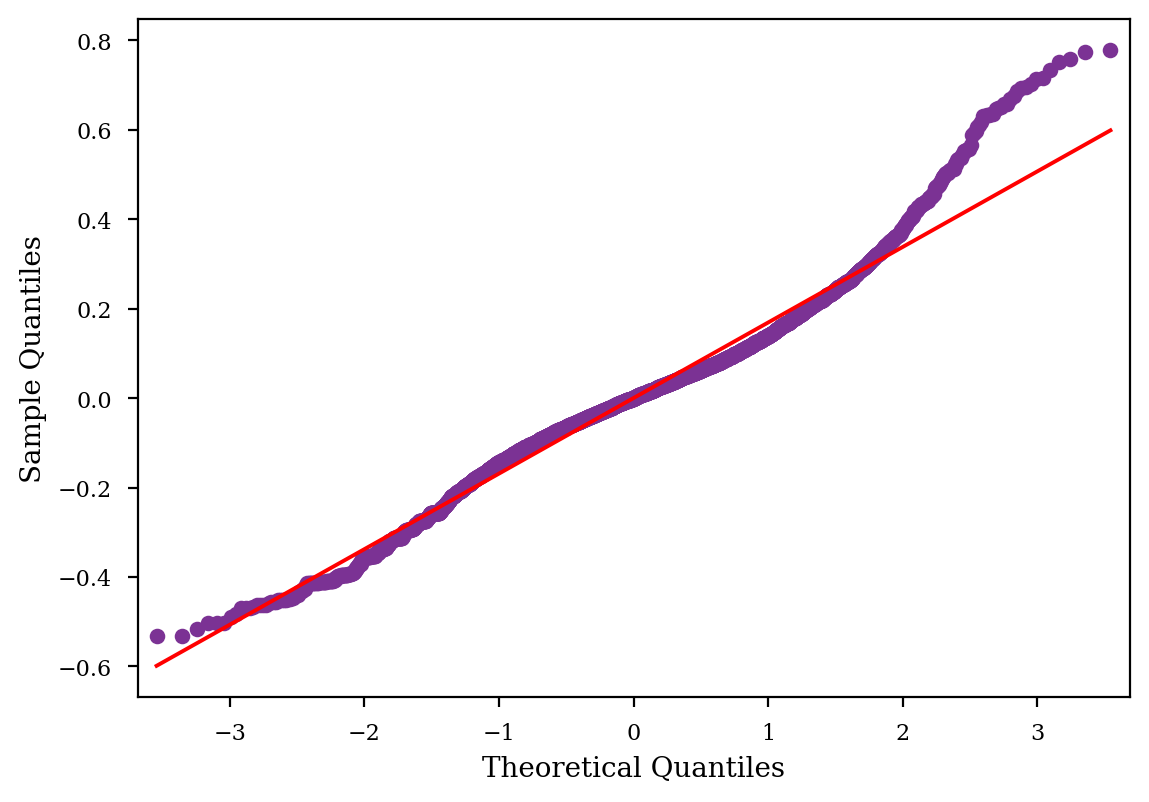

In [86]:


temp_df = results[["basepath","fr_diff_ratio_c","deepSuperficial"]].copy()
# drop nan from temp_df
temp_df.dropna(inplace=True)
# boxcox transform to transform data to normal distribution
temp_df.fr_diff_ratio_c , _ = stats.boxcox(temp_df.fr_diff_ratio_c+1)
# encode categorical variables
lbl=LabelEncoder()
temp_df['basepath_encoded'] = lbl.fit_transform(temp_df[['basepath']])
temp_df['deepSuperficial_encoded'] = lbl.fit_transform(temp_df[['deepSuperficial']])
# fit mixed effects model
temp_df["Intercept"] = 1
exog = temp_df[["Intercept", "deepSuperficial_encoded"]]
md = sm.MixedLM(temp_df["fr_diff_ratio_c"], exog, groups=temp_df["basepath_encoded"], exog_re=exog["Intercept"])
mdf = md.fit(reml=False)
print(mdf.summary())

fig = sm.qqplot(mdf.resid, line="s")
plt.show()

## Testing below

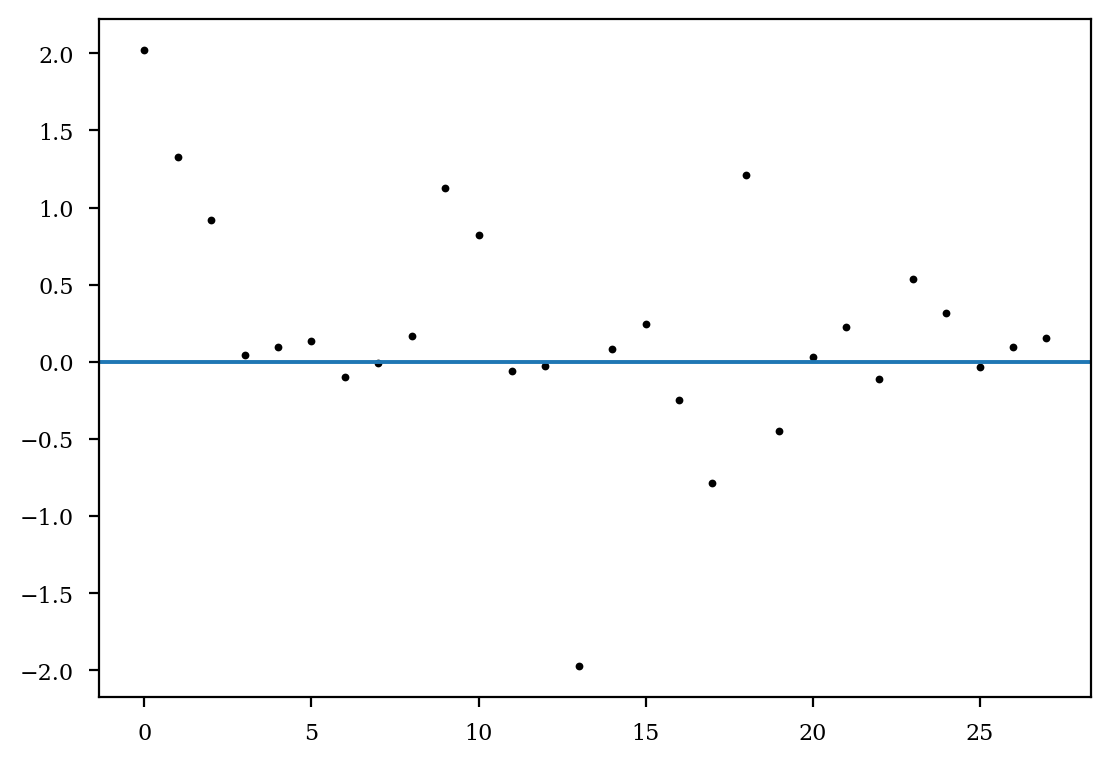

In [62]:
plt.plot(mobile_fr - immobile_fr,'.k')
plt.axhline(0)

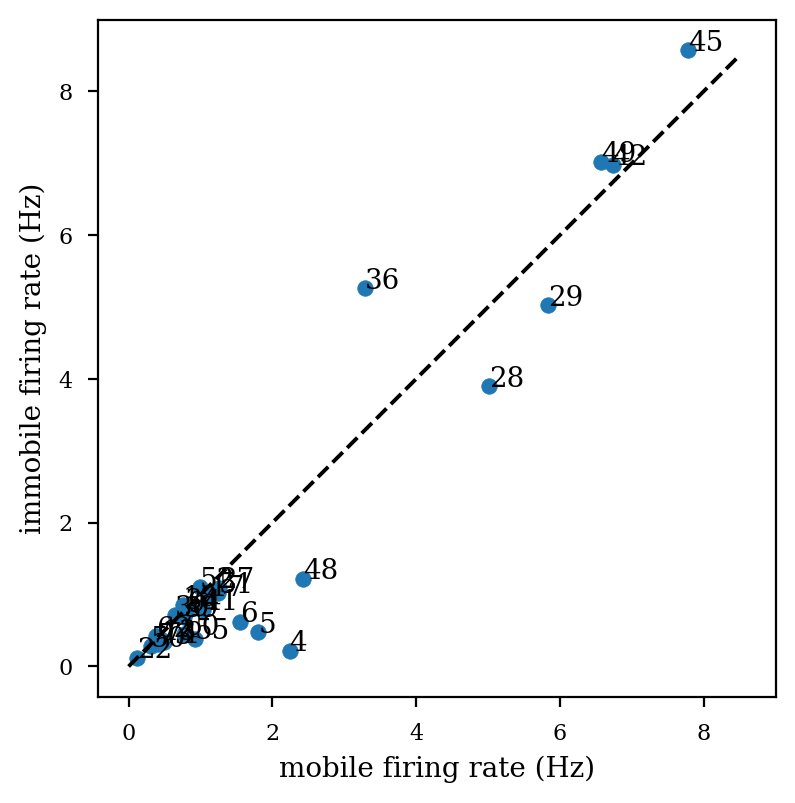

In [56]:

plt.scatter(mobile_fr,immobile_fr)
# plot unity line covering the whole range or plot
plt.plot([0,8.5],[0,8.5],color='k',linestyle='--')
plt.ylabel('immobile firing rate (Hz)')
plt.xlabel('mobile firing rate (Hz)')
plt.xlim([0,8.5])
plt.ylim([0,8.5])
plt.axis('square')
# label each dot with the cell number from cell_metrics.UID
for i, txt in enumerate(cell_metrics.UID):
    plt.annotate(txt, (mobile_fr[i], immobile_fr[i]))